# Titanic Survival


* Importing the Libraries


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

* Getting the Dataset

In [139]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Exploratory Data Analysis

* Head 

In [140]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Tail

In [141]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* Shape of the dataset

In [142]:
df.shape

(891, 12)

* Getting the Basic Information

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Getting the Statistical Information

In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Sum of NaN Values in each column

In [145]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Heatmap of the Null values

<AxesSubplot:>

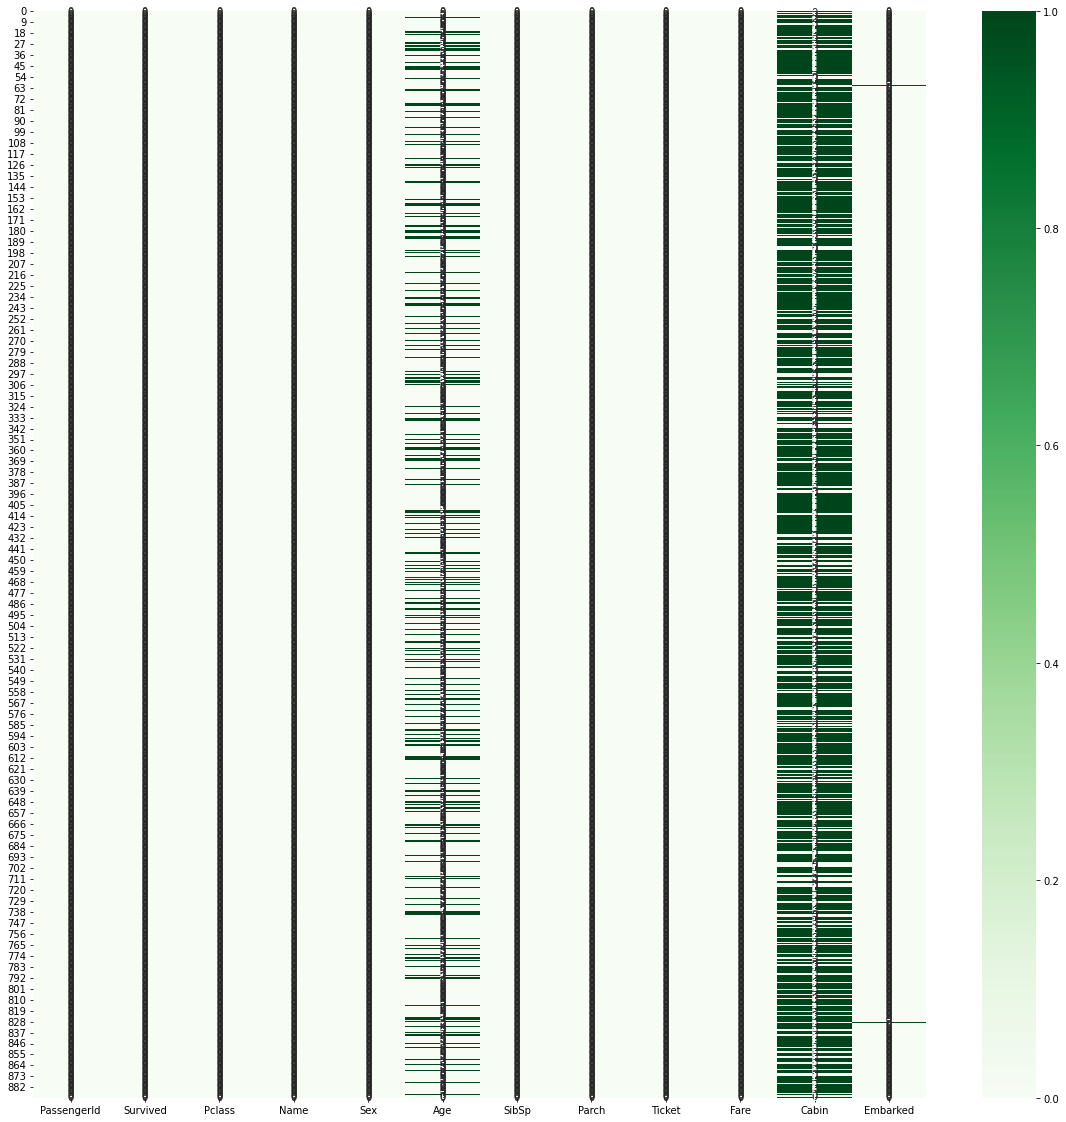

In [146]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), annot=True,cmap='Greens')

* Percentage of the NaN values in the Age column

In [147]:
(df.Age.isna().sum()/len(df.Age))*100

19.865319865319865

* % of the NaN values in the Cabin column

In [148]:
(df.Cabin.isna().sum()/len(df.Cabin))*100

77.10437710437711

* Unique values in the Cabin column


In [149]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

* We can't predict the value of the cabin
* Lot of NaN values

* Dropping the Cabin Feature

In [150]:
df.drop('Cabin',axis=1,inplace=True)

In [151]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Checking for the NaN values

In [152]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

* Different Categories in the Embark 

In [153]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

* Data Points where "Embarked" is Null

 S - Southampton
 Q - Queenstown
 C - Cherbourg

In [154]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


* Checking the embarked where the Pclass=1

In [155]:
(df[df.Pclass==1]['Embarked']).value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

* Checking the emabrked value where the Pclass=2

In [156]:
(df[df.Pclass==2]['Embarked']).value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

* Checkeing the embarked values where the Pclass=3

In [157]:
(df[df.Pclass==3]['Embarked']).value_counts()


S    353
Q     72
C     66
Name: Embarked, dtype: int64

* Checking the Embarked values where the fair is 80.0

In [158]:
(df[df.Fare==80.0]['Embarked']).value_counts()


Series([], Name: Embarked, dtype: int64)

* Checking for the Ticket value = 113572

In [159]:
(df[df.Ticket==113572]['Embarked']).value_counts()


Series([], Name: Embarked, dtype: int64)

* Mean of the Age column

In [160]:
df.Age.mean()

29.69911764705882

* Mode of the Age column

In [161]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

* Median of the Age column

In [162]:
df.Age.median()

28.0

* Plotting the Boxplot for the outliers for the Age column

C:\Users\karan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


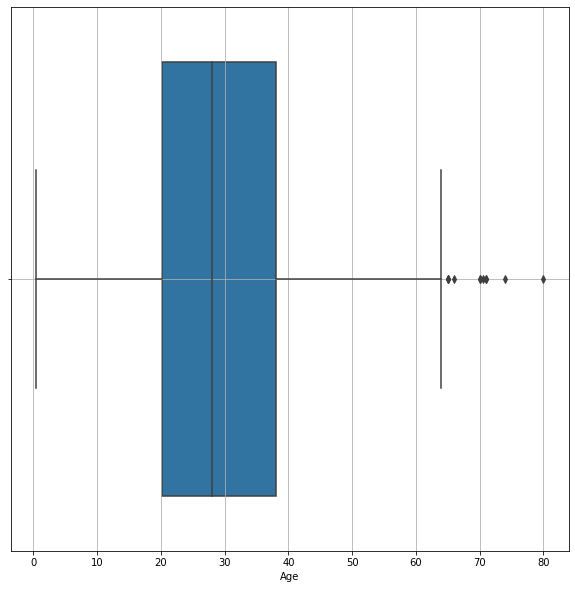

In [163]:
plt.figure(figsize=(10,10))
sns.boxplot(df.Age)
plt.grid()

* Frequency of the values in the Age column

In [164]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Mode is inapproppriate

* Filling the NaN values of the Age column using the Median of the Age column

In [165]:
df.Age.fillna(df.Age.median(),inplace=True)

In [166]:
df.Age.isna().sum()

0

* Checking for Null values

In [167]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

* Dropping the rows where the Embarked Values are NaN

In [168]:
df.dropna(inplace=True)

In [169]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [170]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Dropping the Unwanted Features - PassengerID, Name, Ticket

In [171]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [172]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Data Visualization

* Strength of Male v/s Strength of Female

([<matplotlib.patches.Wedge at 0x225ec68b340>,
 [Text(-0.49644324689069674, 0.9816028232521659, ''),
  Text(0.4964432468906962, -0.9816028232521663, '')])

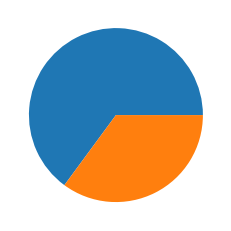

In [173]:
plt.pie(df.Sex.value_counts())

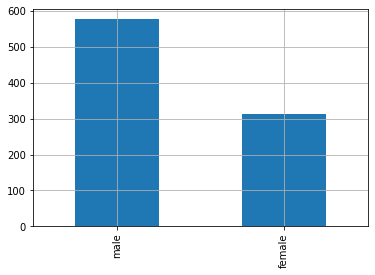

In [174]:
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

* Strength of the Survival

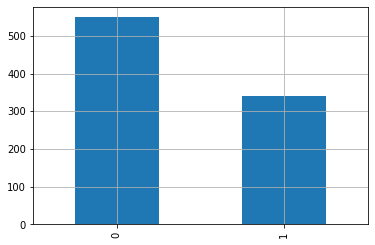

In [175]:
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

* Survival ratio of the Male and Female

In [176]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


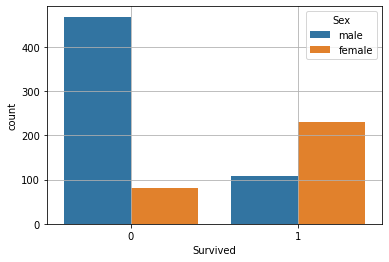

In [177]:
sns.countplot(x='Survived',data=df,hue='Sex')
plt.grid()

* Strength of the Pclass

<AxesSubplot:>

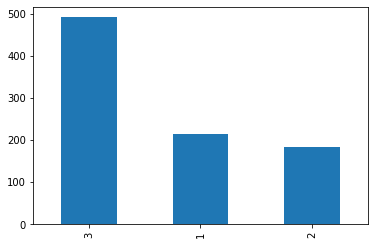

In [178]:
df.Pclass.value_counts().plot.bar(df.Pclass)

* Strength of the Survival wrt Pclass

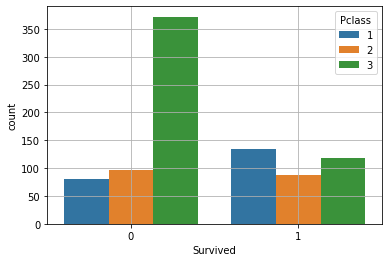

In [179]:
sns.countplot(x='Survived',data=df,hue='Pclass')
plt.grid()

* Changing the dtype of the Age column

In [180]:
df.Age=df.Age.astype(int)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 59.0+ KB


* Changing the Fare's decimal values


In [182]:
df.Fare=df.Fare.round(2)

In [183]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,1,1,female,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S


# Encoding

In [184]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,1,1,female,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S


* Lable Encoding

In [185]:
enc=LabelEncoder()

In [186]:
df.Sex=enc.fit_transform(df.Sex)

In [187]:
df.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

* One Hot Encoding the Embarked

In [192]:
df=pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)

In [193]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


* Dropping the Embarked and C columns

In [194]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [195]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


* Exploratory Data Analysis

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 50.4 KB


* Getting the correlation of the features

<AxesSubplot:>

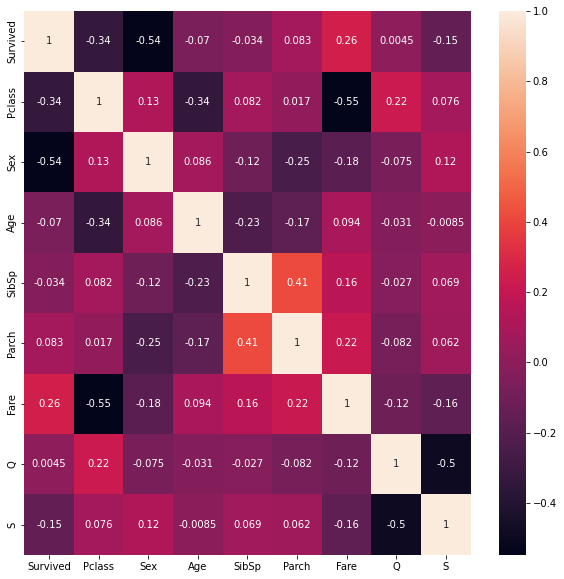

In [199]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

* Pairplot


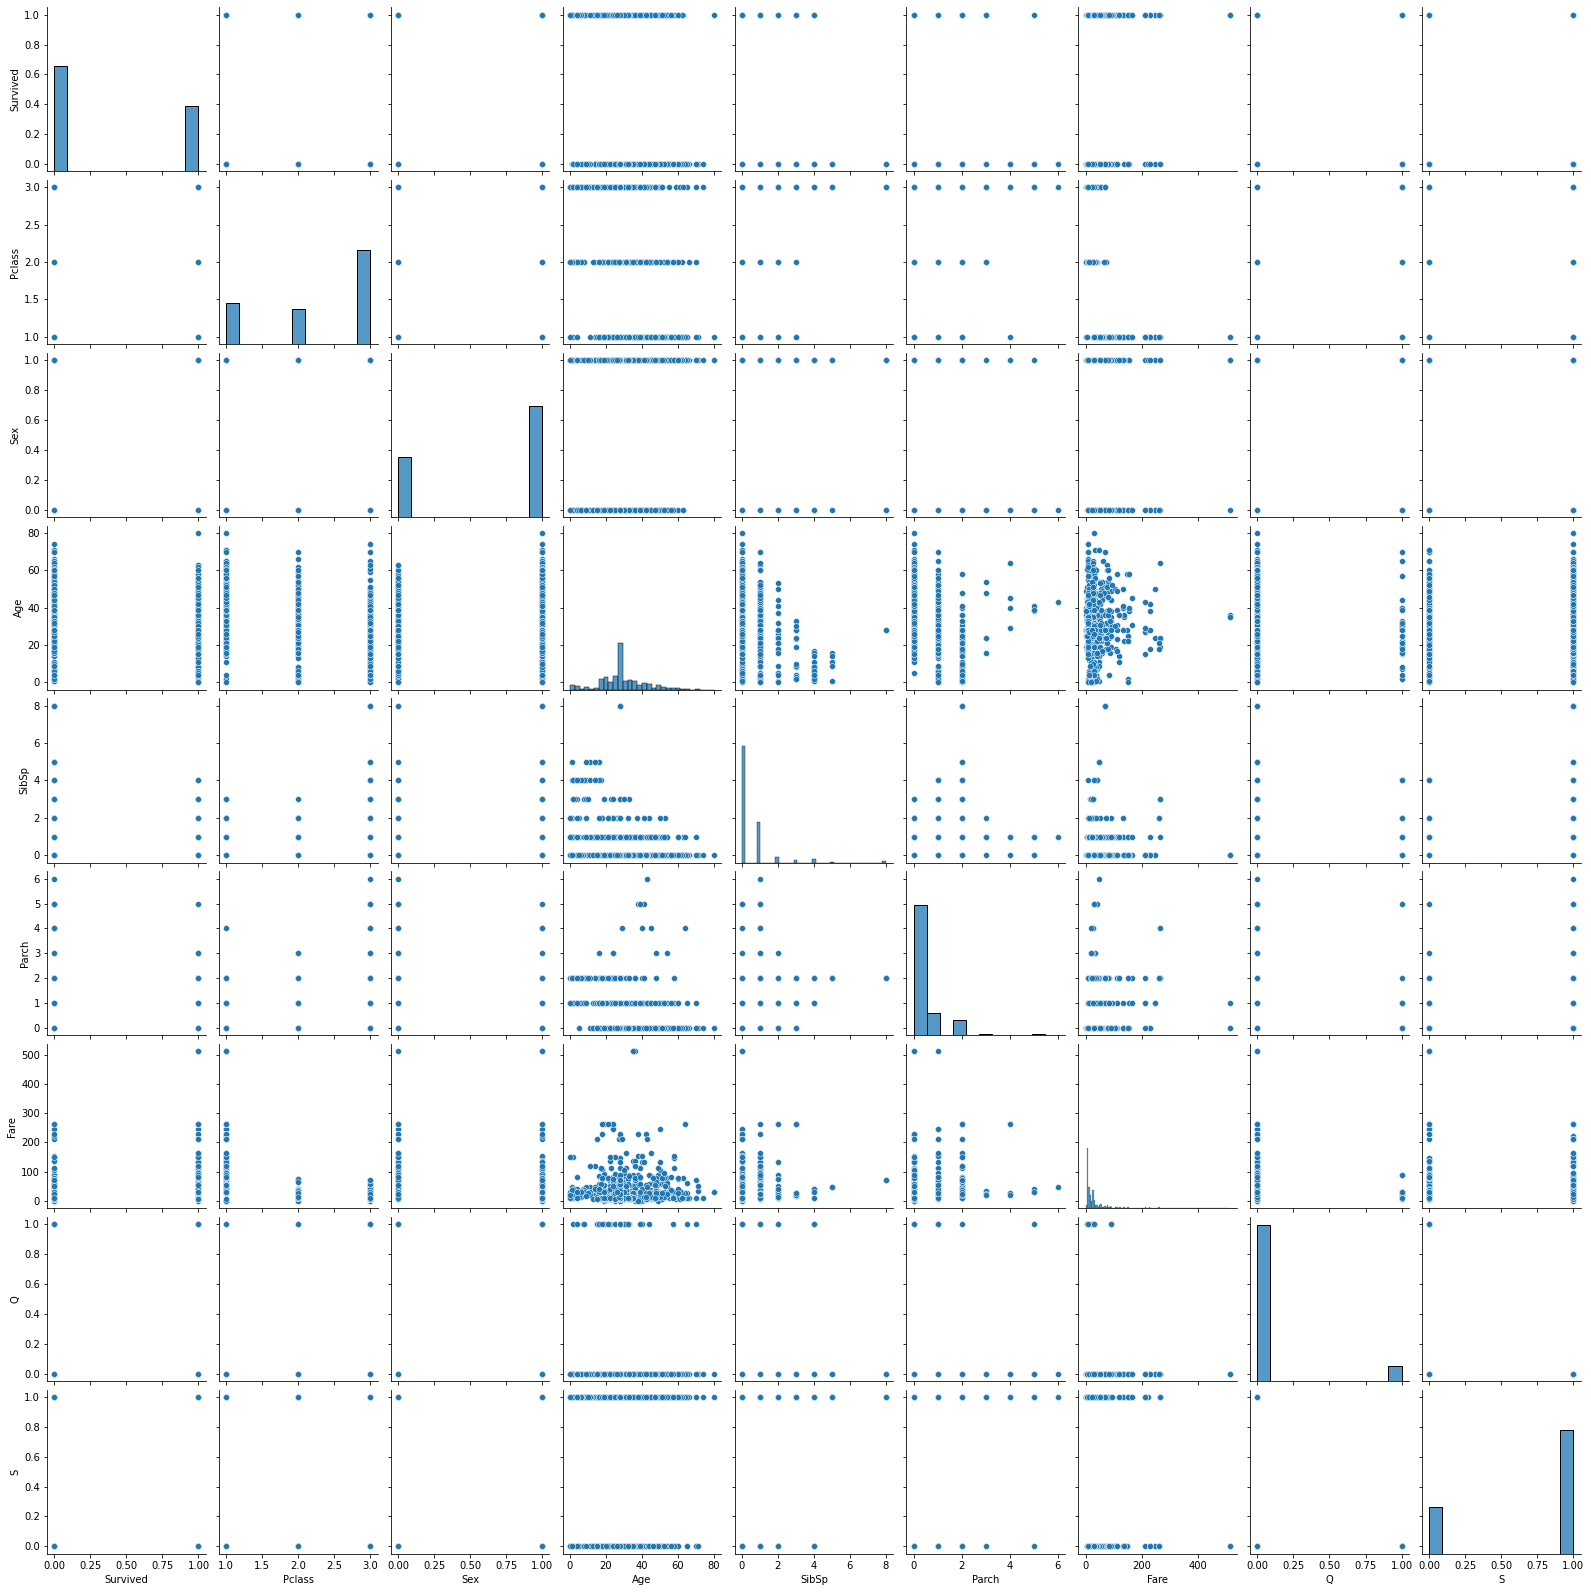

In [200]:
sns.pairplot(df)

# Feature Importance

In [201]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


* Splitting the data

In [204]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [206]:
feat=ExtraTreesClassifier()

In [207]:
feat.fit(x,y)

ExtraTreesClassifier()

In [208]:
feat.feature_importances_

array([0.11148701, 0.28723733, 0.24103748, 0.04289729, 0.04549349,
       0.24249909, 0.00893297, 0.02041534])

<AxesSubplot:>

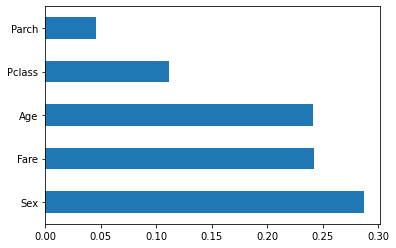

In [211]:
feat_imp=pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(5).plot(kind='barh')